# Google Data Analytics Capstone Project: Online news popularity

In this capstone project I implemented the Google Data Analytics framework to solve a bussiness problem for a fictional company. 

As digital media is growing the competition between online platforms also has rapidly increased, so the analysis of online news trends can bring value and be helpful to different organizations. 
&nbsp;

The Decision Tree and Random Forest algorithms were implemented to predict online news popularity (by shares on social media). To improve the evaluation metric results, Data Normalization and Dimensionality Reduction were applied. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Phase-1:-Ask" data-toc-modified-id="-Phase-1:-Ask-1"><span style="color: steelblue"> Phase 1: Ask</span></a></span></li><li><span><a href="#-Phase-2:-Prepare-&amp;-Phase-3:-Process" data-toc-modified-id="-Phase-2:-Prepare-&amp;-Phase-3:-Process-2"><span style="color: steelblue"> Phase 2: Prepare &amp; Phase 3: Process</span></a></span></li><li><span><a href="#-Phase-4:-Analyze-&amp;-Phase-5:-Share" data-toc-modified-id="-Phase-4:-Analyze-&amp;-Phase-5:-Share-3"><span style="color: steelblue"> Phase 4: Analyze &amp; Phase 5: Share</span></a></span></li><li><span><a href="#-Phase-6:-Act" data-toc-modified-id="-Phase-6:-Act-4"><span style="color: steelblue"> Phase 6: Act</span></a></span></li></ul></div>

## <span style='color:steelblue'> Phase 1: Ask

**Defining the problem**
    
A media and entertainment company wants to investigate what are the most popular news articles categories and the relevant characteristics that determine their popularity to get some insights on how to improve and tailor their own articles. 

The dataset used for research summarizes a heterogeneous set of features about articles published by the Mashable website in a period of two years. The articles' popularity is measured based on sharing in social networks (coded by the variable "shares"). The dataset is publicly available at Kaggle and contains news from websites like Buzzfeed, Mashable, Medium and towards data science.

**Asking effective questions**
- What are the dataset's features (besides article category)?
- Are all the features in the dataset relevant for popularity prediction?
- What are the most relevant features for popularity prediction?
- What are the best machine learning algorithms for prediction in this bussiness problem?

## <span style='color:steelblue'> Phase 2: Prepare & Phase 3: Process




**Exploratory data analysis**

In [2]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from tabulate import tabulate
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [7]:
online_news = pd.read_csv("OnlineNewsPopularity.csv")

In [8]:
online_news = online_news.drop("url", 1) # dropping unnecessary column 

In [315]:
pd.set_option('display.max_columns', None)
online_news.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [316]:
online_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    timedelta                      39644 non-null  float64
 1    n_tokens_title                 39644 non-null  float64
 2    n_tokens_content               39644 non-null  float64
 3    n_unique_tokens                39644 non-null  float64
 4    n_non_stop_words               39644 non-null  float64
 5    n_non_stop_unique_tokens       39644 non-null  float64
 6    num_hrefs                      39644 non-null  float64
 7    num_self_hrefs                 39644 non-null  float64
 8    num_imgs                       39644 non-null  float64
 9    num_videos                     39644 non-null  float64
 10   average_token_length           39644 non-null  float64
 11   num_keywords                   39644 non-null  float64
 12   data_channel_is_lifestyle      

In [318]:
online_news.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

&nbsp;

**Data set description**
&nbsp;

Upon taking a glimpse into the dataset, it was observed that it contains 39644 rows of 60 columns. The columns in the dataset consist of several characteristics describing the particular article, such as **the number of words in the title and body of the new, number of unique words, number of reference links to other sites and the same site, number of images and/or videos, length of the words, category (lifestyle, entertainment, bussiness, social media, technology or world), number of keywords, weekday of publishing, LDA (text classification by topic), words sentiments and other Natural Language Processing features.** 
&nbsp;

The output variable is 'shares' (how many times the article was shared in social media).

It is important to mention that since this dataset was published my mashable.com,  it is limited to some statistics associated with it, probably not the whole data. However, it was determined by the organization's reputation that it is accurate and reliable second party data. 


&nbsp;

## <span style='color:steelblue'> Phase 4: Analyze & Phase 5: Share


In these phases data visualization was created to communicate the story the data is tellling. This further data exploration helped understand the data and get useful insights. Then, machine learning methods were implemented to identify more patterns, make predictions and draw some conclusions.

**Data visualization**

The news' shares distribution was plotted below just to give an idea of the number of shares per article, Th plot is right skewed and although the maximum number of shares is around 800 thousand, the median is only 1400 shares. 

In [322]:
online_news[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

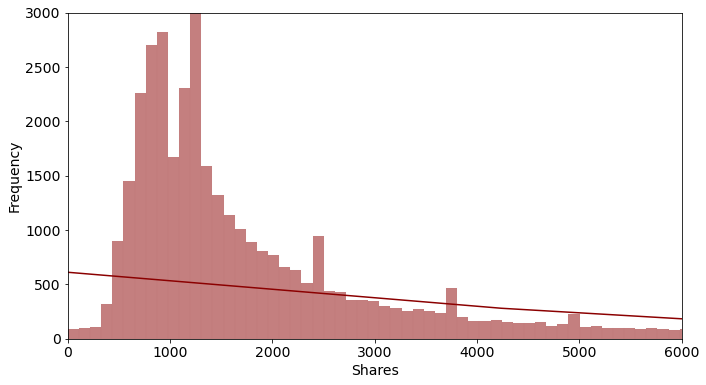

In [324]:
# Shares distribution

plt.figure(figsize = (11,6))

sns.histplot(online_news[' shares'], color = "darkred", kde=True, alpha=0.5)
plt.xlabel('Shares', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlim(0, 6000)
plt.ylim(0, 3000)

plt.show()

&nbsp;
&nbsp;

The distribution of weekday of publishing for the online news was plotted below, as well as their categories. In these, it was observed that most publishing occurs during weekdays, especially from Tuesday to Thursday and some of the most popular categories are 'Entertainment', 'Bussiness', 'Technology' and 'World'. 


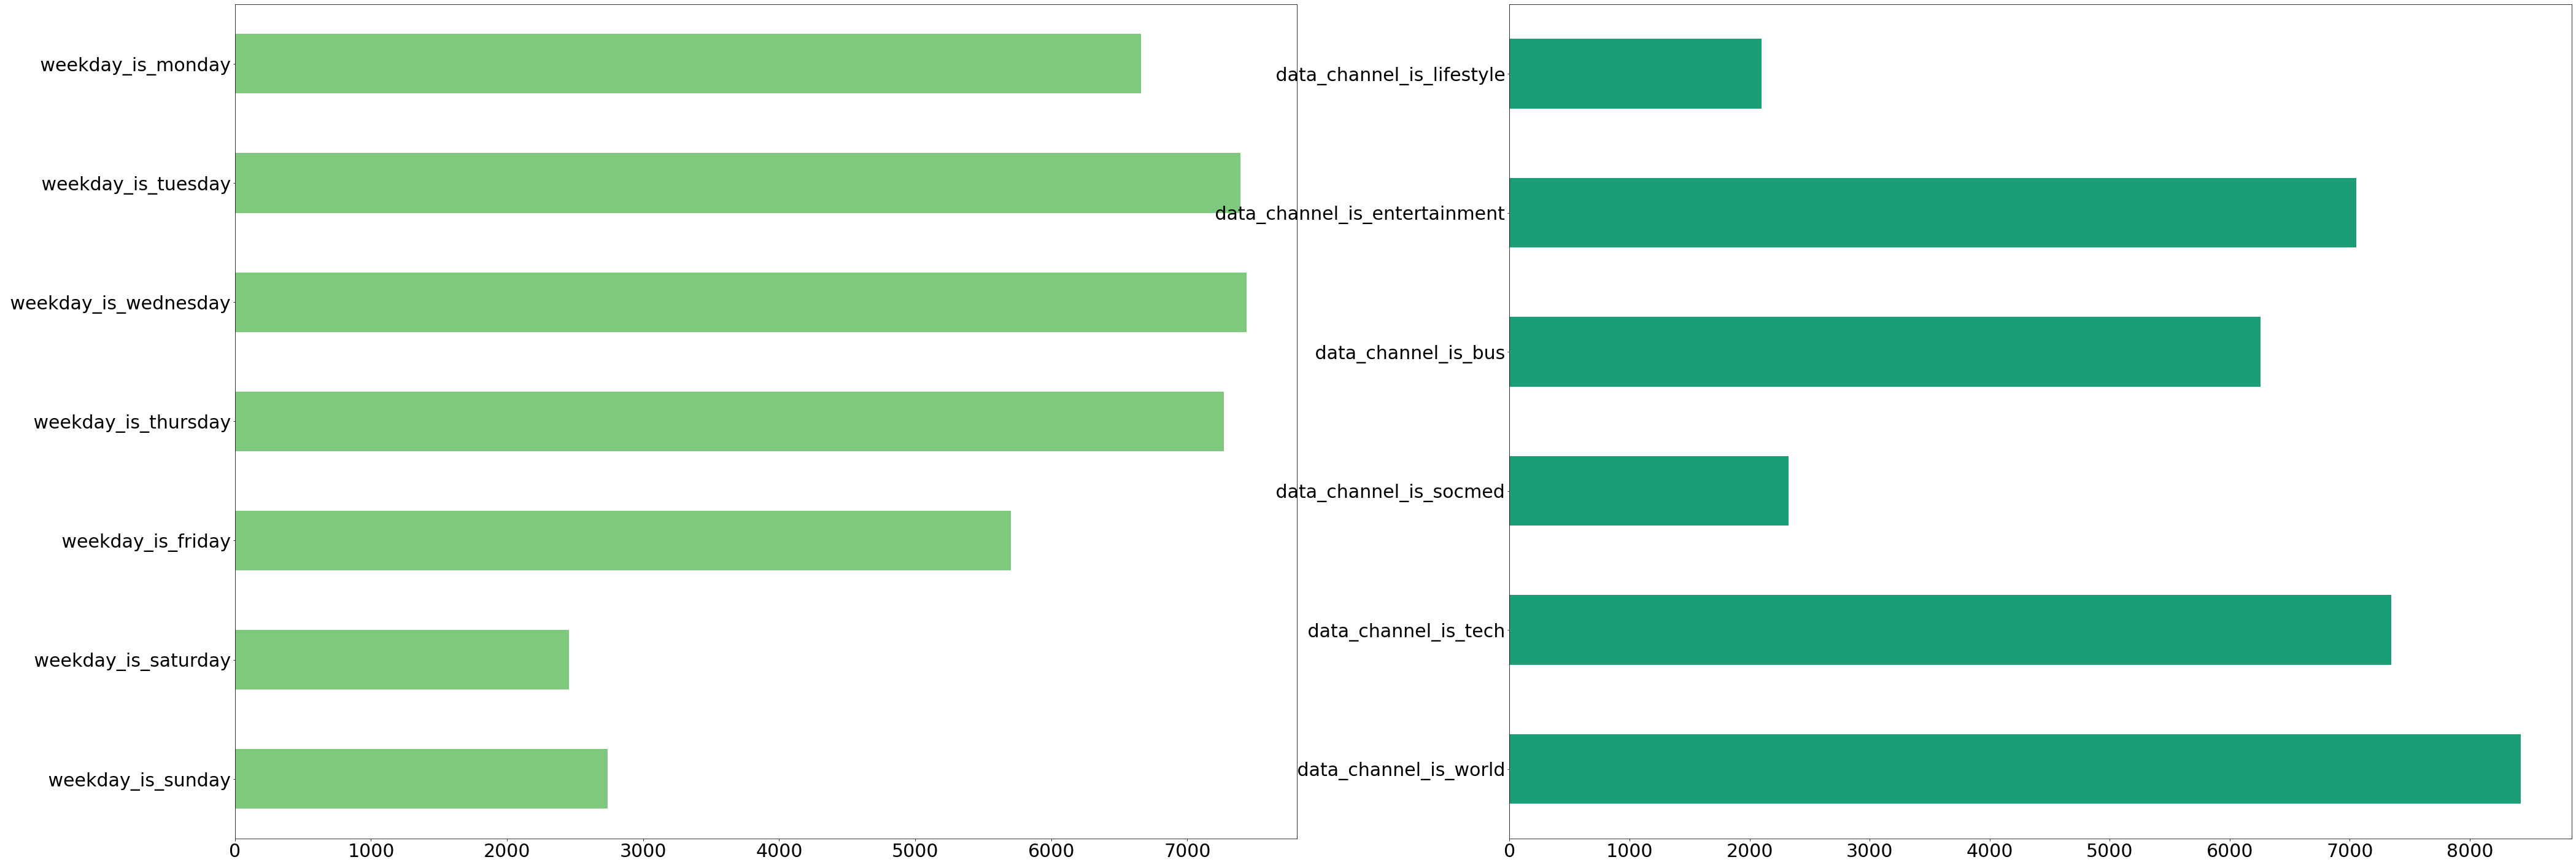

In [223]:
# Count plots of weekday and category

figure, axes = plt.subplots(1, 2, figsize=(9,25))


p1 = online_news[weekday].sum().plot(kind='barh', ax=axes[0], fontsize=30, cmap= 'Accent').invert_yaxis()
p2 = online_news[category].sum().plot(kind='barh', ax=axes[1], fontsize=30, cmap= 'Dark2').invert_yaxis()


plt.subplots_adjust(right=6)
plt.show()

&nbsp;

&nbsp;



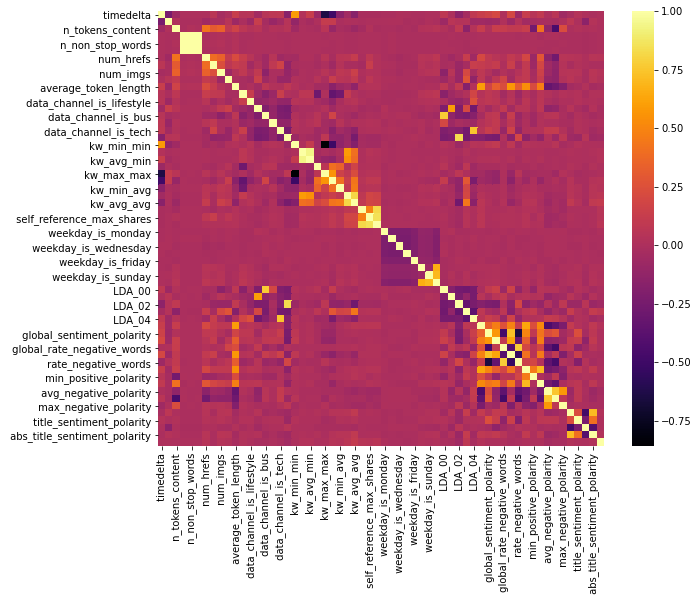

In [325]:
# Correlation heatmap

corr_matrix = online_news.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, vmax=1, cmap="inferno")

plt.show()

&nbsp;

It was observed in the correlation heatmap above that there were only very few **highly correlated variables** (around > 0.80). These impart the same information to the model, adding noise instead of incremental information. To improve model fitting, the code chunk below was used to eliminate them. 

In [9]:
# Function for highly correlated variables elimination

def highcorr(data, threshold):
    columns = set()
    corr_matrix = data.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in columns):
                names = corr_matrix.columns[i] 
                columns.add(names)
                if names in data.columns:
                    del data[names] 

In [10]:
highcorr(online_news, 0.80) # setting the threshold and eliminating variables

In [13]:
len(online_news.columns)

54

&nbsp;

The columns in the dataset were reduced to 54.

**Data preprocessing and ML model fitting**

In [338]:
# Preprocessing

X = online_news.loc[:, online_news.columns != ' shares']  # matrix of features
y = online_news.loc[:, ' shares']  # dependent variable vector (shares)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)  # dataset splitting

&nbsp;

First, Decision tree and Random Forest were implemented to test how well they performed on the dataset without further preprocessing. 

In [339]:
# Decision tree

# Fit
tree_reg = DecisionTreeRegressor(random_state = 0, max_depth = 5)
tree_reg.fit(X_train, y_train)

# Evaluation through rmse
tree_ypred = tree_reg.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_ypred))
print(tree_rmse)

8415.188135336013


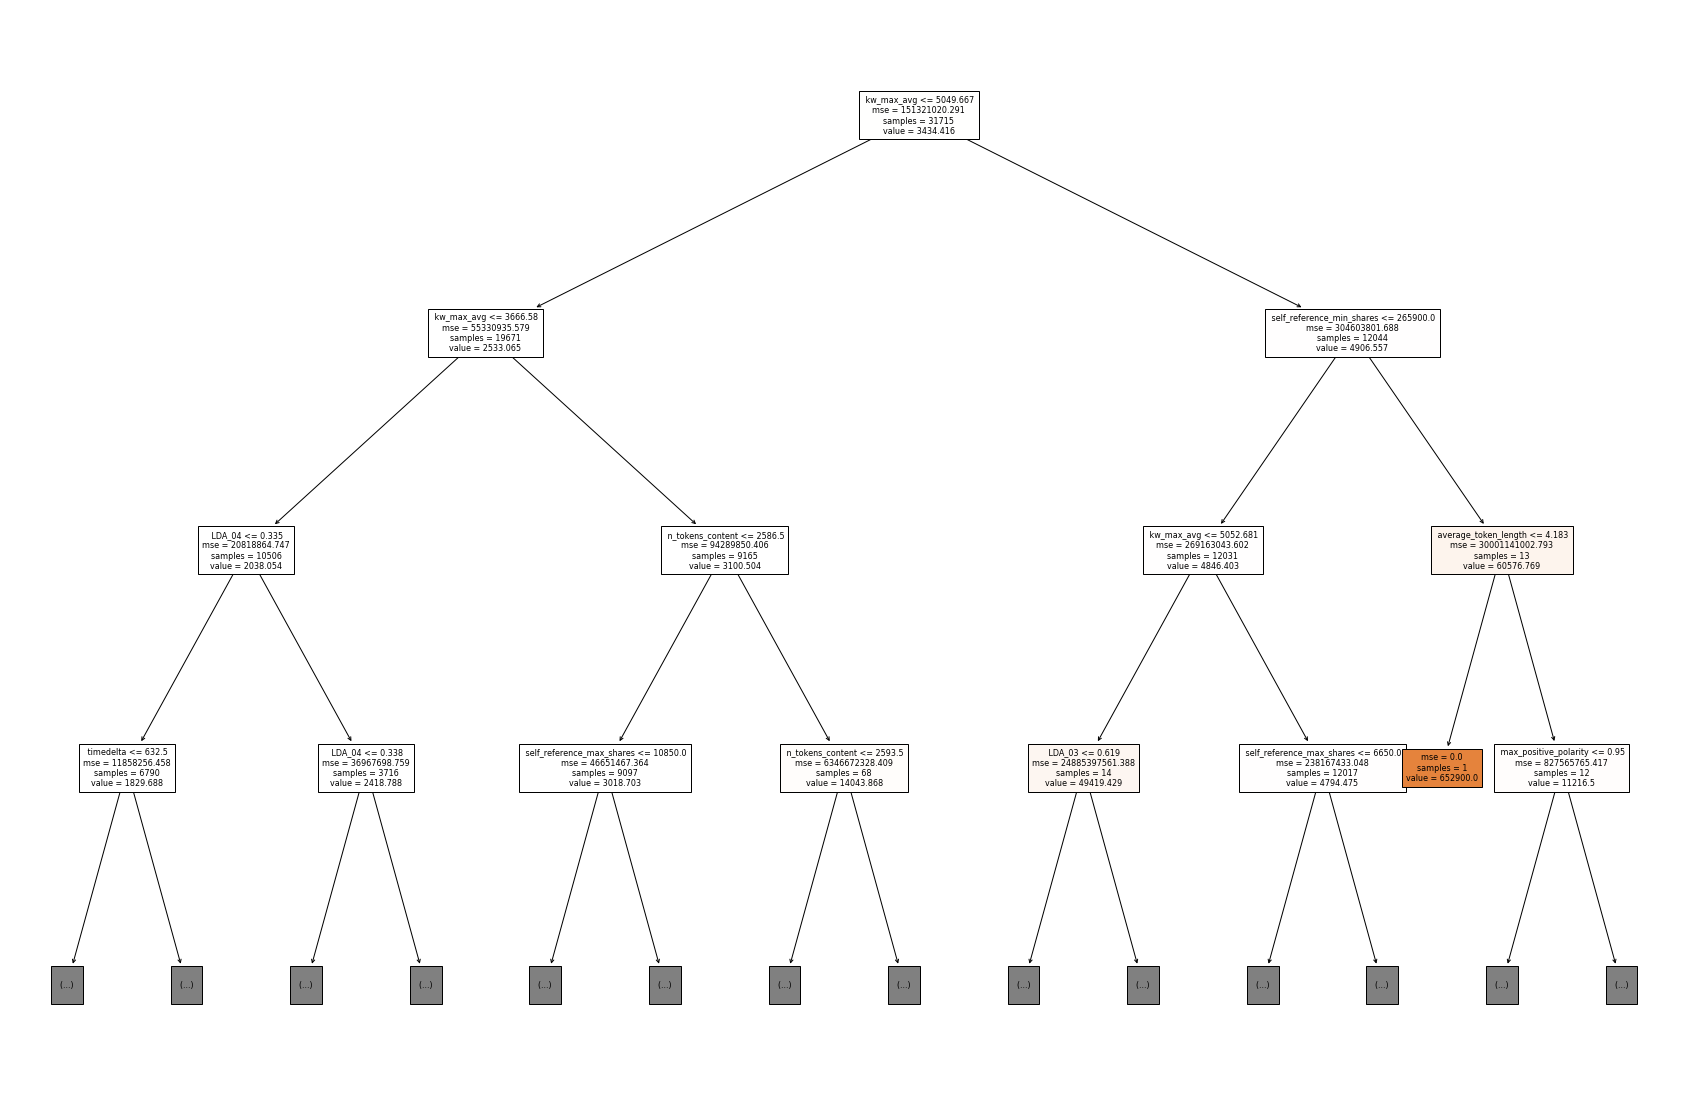

In [358]:
# Tree plot

fig = plt.figure(figsize=(30,20))
plot = tree.plot_tree(tree_reg, feature_names = X_train.columns ,filled = True, max_depth = 3, fontsize= 8)

In [359]:
# Random Forest

# Fit
forest_reg = RandomForestRegressor(n_estimators = 300, max_depth = 3, random_state = 0)
forest_reg.fit(X_train, y_train) 

# Evaluation through rmse
forest_ypred = forest_reg.predict(X_test)
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_ypred))
print(forest_rmse)

8338.820001231108


In [361]:
# Random forest feature importance (permutation importance on test set)

permutation = PermutationImportance(forest, random_state=1).fit(X_train, y_train)
(eli5.show_weights(permutation, top=60, feature_names = X_train.columns.tolist()))

Weight,Feature
0.0831 ± 0.0190,self_reference_min_shares
0.0787 ± 0.0290,kw_max_avg
0.0304 ± 0.0020,n_tokens_content
0.0297 ± 0.0058,average_token_length
0.0088 ± 0.0025,self_reference_max_shares
0.0059 ± 0.0024,LDA_01
0.0049 ± 0.0051,weekday_is_monday
0.0047 ± 0.0006,n_unique_tokens
0.0041 ± 0.0028,avg_positive_polarity
0.0031 ± 0.0013,kw_max_min


&nbsp;

The permutation feature importance technique overcomes some drawbacks of other techniques (overfitting and calculating only on the train set). Its principle consists of studying a feature's impact on performance by making said feature unusable for the model. Negative values, close to zero or zero are interpreted as the feature being unimportant for prediction. 

In [300]:
# RMSE results

print(tabulate([['Decision tree', tree_rmse], 
                ['Random Forest', forest_rmse]]))

-------------  -------
Decision tree  8415.19
Random Forest  8338.82
-------------  -------


The evaluation metric chosen was the root mean squared error (RMSE). A commonly used metric (loss function) for regression models that indicates the absolute fit of the model to the data, that is how close the observed data points are to the model’s predicted values. RMSE is a negatively-oriented score, which means that lower values are better, and **it expresses average model prediction error in units of the variable of interest**. 

Although Random Forest slightly improved the result, considering that the median of shares is 1400 and the 75th percentile of shares is 2800, the score could be much improved. **That was achieved through data normalization and dimensionality reduction through PCA**, shown in the following code.

In [362]:
# Data Normalization

news_array = online_news.values

min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(news_array)
scaled_news = pd.DataFrame(scaled)

In this case, data normalization was appropiate for the varied dataset. Max-Min Normalization (Min-Max scaling) re-scales features with a distribution value between 0 and 1. 

In [363]:
X = scaled_news.drop(53,axis=1)  # matrix of features
y = scaled_news[53]  #  dependent variable vector (shares)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)  # dataset splitting

Since the dataset contains several features, dimensionality reduction was implemented. Principal Component Analysis uses linear algebra to transform the dataset into a compressed form. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result (supervised). Usually performs better for continuous normally distributed data, and it can be used to improve classification (most commonly) and regression models.

In [382]:
# PCA: Dimensionality reduction

# Transforming 
pca = PCA(n_components = 2)
Xtrain_pca = pca.fit_transform(X_train)
Xtest_pca = pca.transform(X_test)

# Model fiting
pca_forest = RandomForestRegressor(n_estimators = 200, max_depth = 8, random_state = 0)
pca_forest.fit(Xtrain_pca, y_train)

# Model evaluation
pca_ypred = pca_forest.predict(Xtest_pca)
pca_rmse = np.sqrt(mean_squared_error(y_test, pca_ypred))
print('Random Forest + Normalization + PCA - RMSE:', round(pca_rmse, 5))

Random Forest + Normalization + PCA - RMSE: 0.01015


The RMSE score was greatly improved with the approaches taken. 

**Conclusions**

The exploratory data analysis allowed to communicate the data's characteristics. The random forest algorithm is a good choice for prediction once it is improved through data normalization and PCA. The algorithm's feature importance provided useful insights about the most relevant features for article popularity prediction.

## <span style='color:steelblue'> Phase 6: Act 

**What will be the strategy?**
1. Based on the analysis, identify the main features that are important for news articles popularity.
2. Prioritize those features while tailoring the company's articles.
3. Prioritize said articles on the social media ads campaign.
4. Test and learn: KPIs and iteration should be well defined. **In this case, one of the most relevant KPIs is "Average engagement rate", which is a metric divides all the engagement a post receives (including likes, comments, saves and favorites) by the total number of followers on the social channel. Other relevant KPIs would be Conversion rate, Click-through rate, Bounce rate, Cost per click.**  
5. Optional: gather additional internal data and second or third party data to also get more insights on customer segmentation and further improve social media engagement.
 